In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('rape.csv')
data=pd.DataFrame(data=data)
data

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
5,Andaman & Nicobar Islands,2002,Victims of Other Rape,2,0,0,1,1,0,2,0
6,Andaman & Nicobar Islands,2003,Total Rape Victims,2,0,0,1,0,0,2,1
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
8,Andaman & Nicobar Islands,2003,Victims of Other Rape,2,0,0,1,0,0,2,1
9,Andaman & Nicobar Islands,2004,Total Rape Victims,10,0,1,7,1,1,10,0


In [3]:
data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [4]:
data.tail()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0
1049,West Bengal,2010,Victims of Other Rape,2307,0,21,51,1777,458,2307,0


In [5]:
data.dtypes

Area_Name                    object
Year                          int64
Subgroup                     object
Rape_Cases_Reported           int64
Victims_Above_50_Yrs          int64
Victims_Between_10-14_Yrs     int64
Victims_Between_14-18_Yrs     int64
Victims_Between_18-30_Yrs     int64
Victims_Between_30-50_Yrs     int64
Victims_of_Rape_Total         int64
Victims_Upto_10_Yrs           int64
dtype: object

In [6]:
data.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [7]:
data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [8]:
data['Rape_Cases_Reported'].unique()

array([   3,    1,    2,    0,   10,    4,    6,   12,   18,   24,  871,
        867, 1002,    5,  997,  946,   15,  931, 1016, 1011,  935,  917,
       1049, 1048, 1070,    7, 1063, 1257,   13, 1244, 1188, 1186, 1362,
         33,   38,   31,   42,   35,   37,   48,   59,   47,  817,    8,
        809,  970,  960, 1095,   19, 1076, 1171, 1156, 1238, 1231, 1232,
       1437, 1436, 1438, 1431, 1631,    9, 1622, 1721, 1708,  888,  880,
       1040, 1037,  985,  984, 1390, 1384, 1147, 1137, 1225, 1555, 1553,
       1302, 1299,  929,  928,  795,  793,   16,   17,   32,   14,   22,
         20,   29,  959,  953,  992,   63,  898,   39,  859,  969,   78,
        891,  990,  110,  995,   97,  982,  919,  978,  947,  976,  952,
       1012,   21,  991,  381,  372,  403,  371,  490,  469,  551,  535,
        658,  626,  623,   26,  597,  598,  580,  466,  429,  450,  507,
        486,   36,   30,   46,   34,  286,  284,  267,  257,  236,  229,
        339,  325,  324,  305,  354,  338,  316,  3

In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
Area_Name                    1050 non-null object
Year                         1050 non-null int64
Subgroup                     1050 non-null object
Rape_Cases_Reported          1050 non-null int64
Victims_Above_50_Yrs         1050 non-null int64
Victims_Between_10-14_Yrs    1050 non-null int64
Victims_Between_14-18_Yrs    1050 non-null int64
Victims_Between_18-30_Yrs    1050 non-null int64
Victims_Between_30-50_Yrs    1050 non-null int64
Victims_of_Rape_Total        1050 non-null int64
Victims_Upto_10_Yrs          1050 non-null int64
dtypes: int64(9), object(2)
memory usage: 90.3+ KB


In [13]:
data.shape

(1050, 11)

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
 
data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,0,0,0,3,0,0,3,0,0,3,0
1,0,0,1,1,0,0,1,0,0,1,0
2,0,0,2,2,0,0,2,0,0,2,0
3,0,1,0,2,0,0,1,1,0,2,0
4,0,1,1,0,0,0,0,0,0,0,0


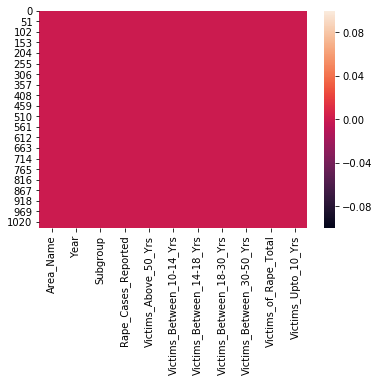

In [15]:
sns.heatmap(data.isnull())

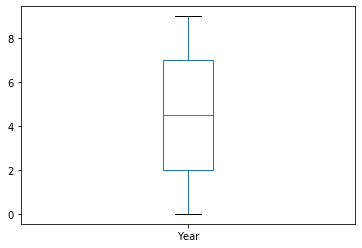

In [16]:
data['Year'].plot.box()

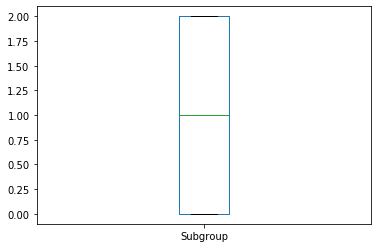

In [17]:
data['Subgroup'].plot.box()

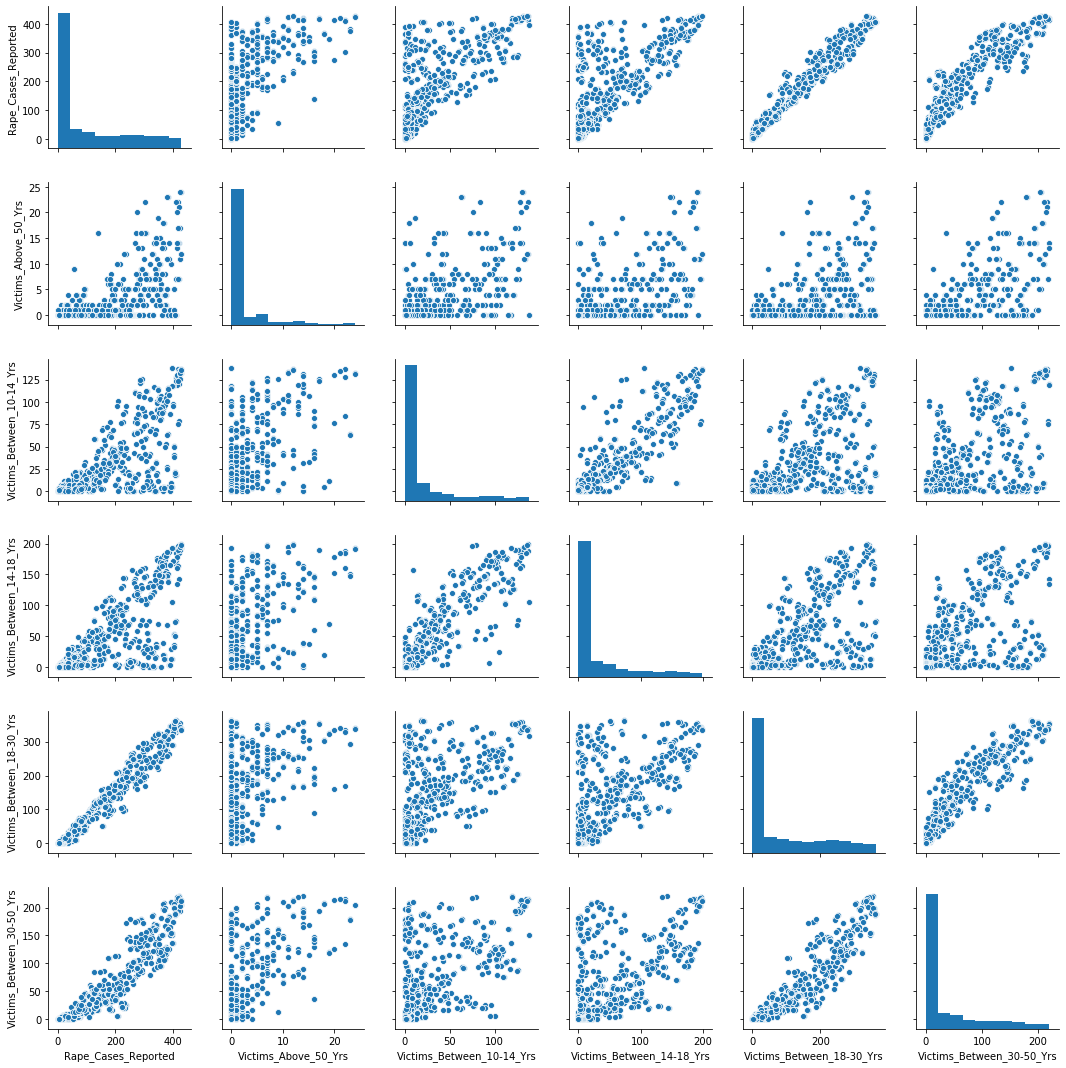

In [19]:
sns.pairplot(data, vars=["Rape_Cases_Reported", "Victims_Above_50_Yrs","Victims_Between_10-14_Yrs", "Victims_Between_14-18_Yrs","Victims_Between_18-30_Yrs","Victims_Between_30-50_Yrs"])

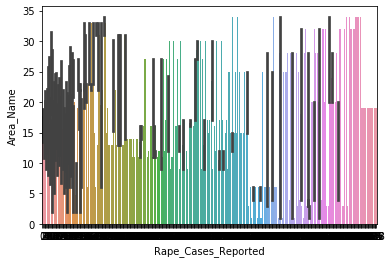

In [21]:
sns.barplot(x="Rape_Cases_Reported", y="Area_Name", data=data)

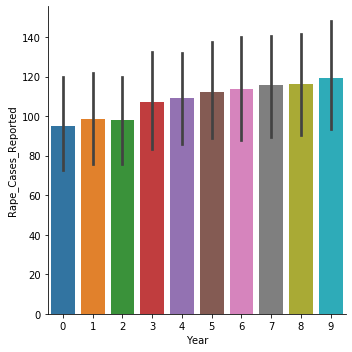

In [22]:
sns.factorplot(x="Year", y="Rape_Cases_Reported", data=data, kind='bar')